In [1]:
import datetime

import numpy as np
import pandas as pd
import torch
from timediffusion import TD

import matplotlib.pyplot as plt

import yfinance as yf

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


# Getting historical bitcoin prices from yahoo finance

<Axes: title={'center': 'Close'}, xlabel='Date'>

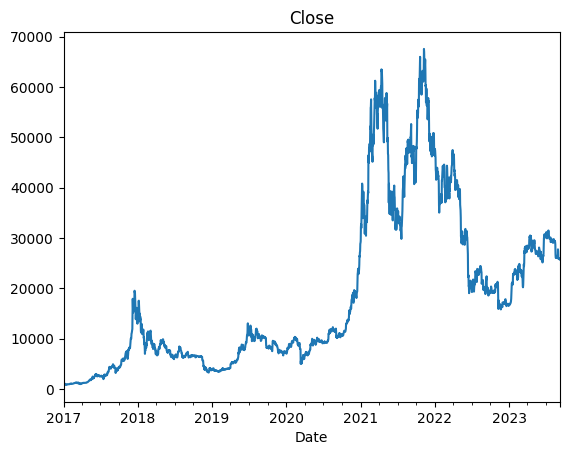

In [2]:
btc_usd = yf.Ticker('BTC-USD')
history = btc_usd.history(start="2017-01-01",  end=datetime.datetime.now())
history.Close.plot(title='Close')

In [3]:
seq = history.Close.values.reshape(1, - 1)

# Fitting TD framework

100%|██████████| 20/20 [06:41<00:00, 20.08s/it]


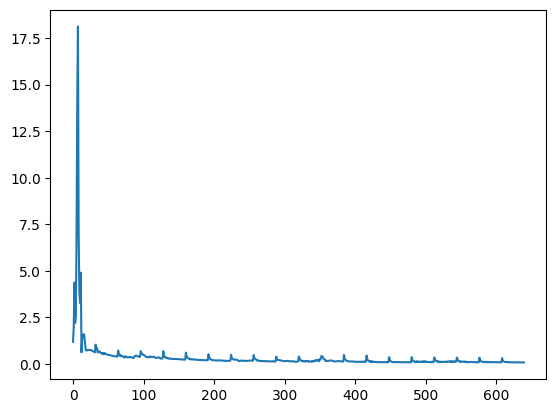

In [4]:
model = TD(input_dims=seq.shape)
losses = model.fit(seq, verbose=True)
plt.plot(losses)

# Checking fit

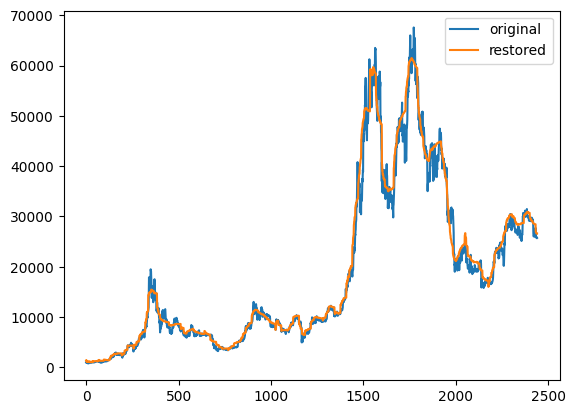

MAE distance between original and restored  1.3e+03


In [5]:
res = model.restore(shape=seq.shape)
res = res.cpu().numpy()

plt.plot(seq[0])
plt.plot(res[0])
plt.legend(["original", "restored"])
plt.show()

mae_dist = np.abs(res - seq).mean()
print(f"MAE distance between original and restored {mae_dist: .1e}")

# Forecast for 400 days

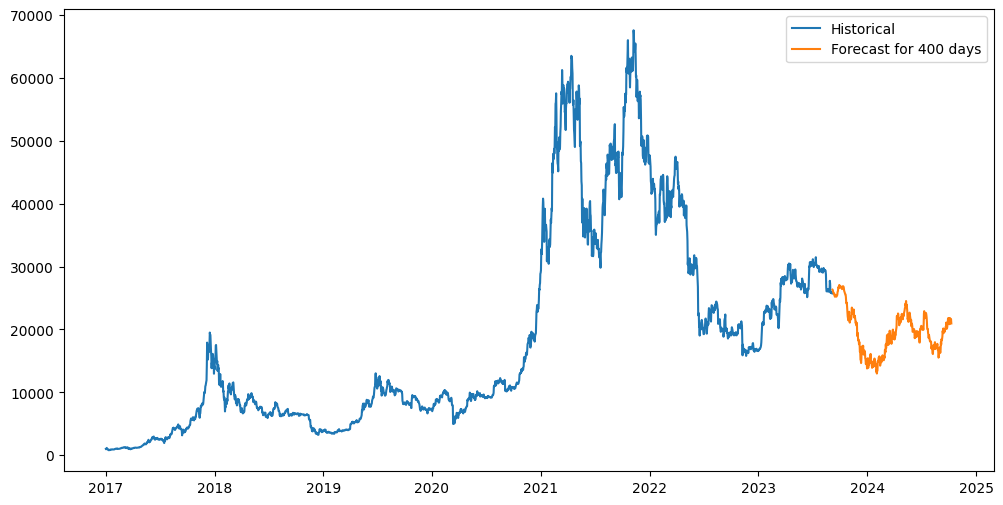

In [6]:
horizon = 400
forecast_res = model.forecast(horizon).cpu().numpy()

new_date_range = pd.date_range(start = history.index[- 1] + pd.Timedelta(1, unit="day"), periods=horizon)
plt.figure(figsize=(12, 6))
plt.plot(history.index, seq[0])
plt.plot(new_date_range, forecast_res[0])
plt.legend([f"Historical", f"Forecast for {horizon} days"])
plt.show()

# Forecast for 1200 days

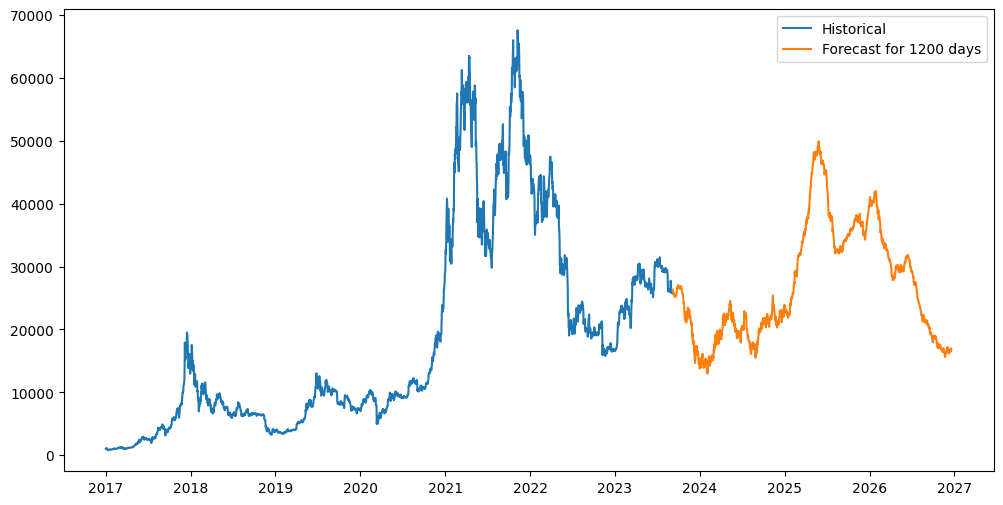

In [7]:
horizon = 1200
forecast_res = model.forecast(horizon).cpu().numpy()

new_date_range = pd.date_range(start = history.index[- 1] + pd.Timedelta(1, unit="day"), periods=horizon)
plt.figure(figsize=(12, 6))
plt.plot(history.index, seq[0])
plt.plot(new_date_range, forecast_res[0])
plt.legend([f"Historical", f"Forecast for {horizon} days"])
plt.show()

# Forecast for 2 500 days

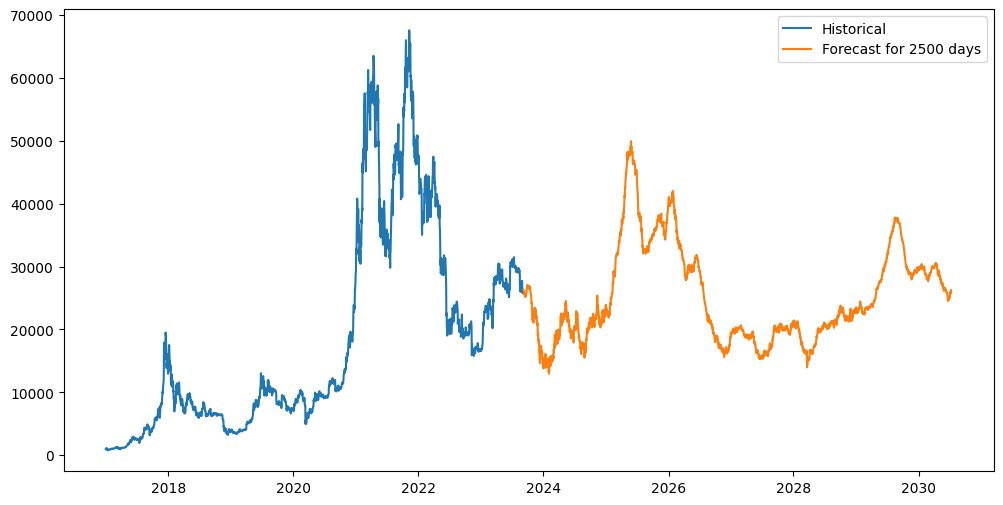

In [8]:
horizon = 2500
forecast_res = model.forecast(horizon).cpu().numpy()

new_date_range = pd.date_range(start = history.index[- 1] + pd.Timedelta(1, unit="day"), periods=horizon)
plt.figure(figsize=(12, 6))
plt.plot(history.index, seq[0])
plt.plot(new_date_range, forecast_res[0])
plt.legend([f"Historical", f"Forecast for {horizon} days"])
plt.show()

# Forecast for 10 000 days

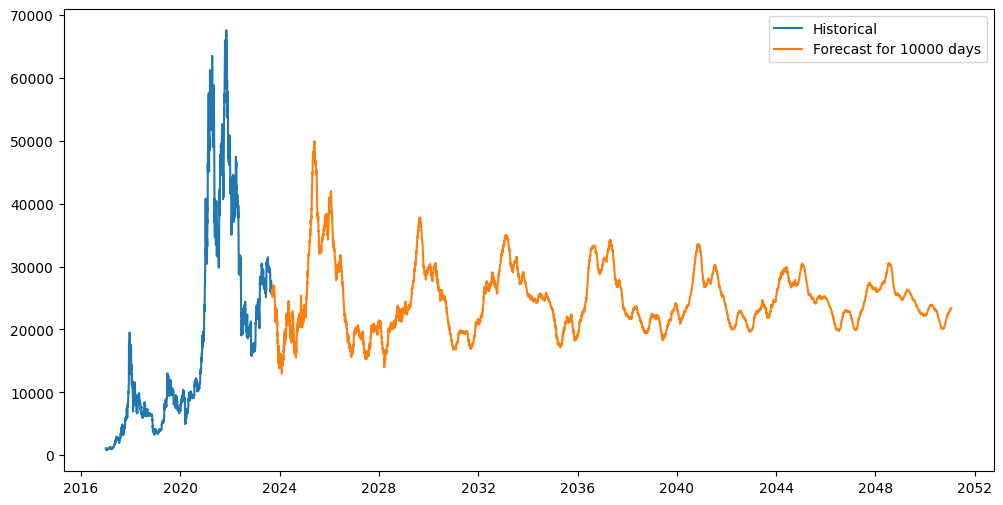

In [9]:
horizon = 10_000
forecast_res = model.forecast(horizon).cpu().numpy()

new_date_range = pd.date_range(start = history.index[- 1] + pd.Timedelta(1, unit="day"), periods=horizon)
plt.figure(figsize=(12, 6))
plt.plot(history.index, seq[0])
plt.plot(new_date_range, forecast_res[0])
plt.legend([f"Historical", f"Forecast for {horizon} days"])
plt.show()